# Logistic Regression Practice Exercise
## Chemotherapy for Stage B/C colon cancer
Description
These are data from one of the first successful trials of adjuvant chemotherapy for colon cancer. Levamisole is a low-toxicity compound previously used to treat worm infestations in animals; 5-FU is a moderately toxic (as these things go) chemotherapy agent. There are two records per person, one for recurrence and one for death

**Attribute Information**
- id:	id
- study:	1 for all patients
- sex:	1=male
- age:	in years
- obstruct:	obstruction of colon by tumour
- perfor:	perforation of colon
- adhere:	adherence to nearby organs
- nodes:	number of lymph nodes with detectable cancer
- time:	days until event or censoring
- status:	censoring status
- differ:	differentiation of tumour (1=well, 2=moderate, 3=poor)
- extent:	Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
- surg:	time from surgery to registration (0=short, 1=long)
- node4:	more than 4 positive lymph nodes
- etype:	event type: 1=recurrence,2=death

**Loading Libraries**

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

**Question 1: Import the Dataset**

In [28]:
df=pd.read_csv("colon.csv").drop('Unnamed: 0',axis=1)

In [29]:
df.head()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
0,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
1,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
2,2,1,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
3,2,1,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
4,3,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2


**Question 2: Get the Dimensionality of the Dataset.**

In [30]:
df.shape

(1858, 15)

**Question 3: How many Missing Values are there? Drop all missing values.**

In [31]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

id          0
study       0
sex         0
age         0
obstruct    0
perfor      0
adhere      0
nodes       0
status      0
differ      0
extent      0
surg        0
node4       0
time        0
etype       0
dtype: int64

**Question 4: Generate the five point summary of the data set.**

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1776.0,466.506757,269.321338,1.0,234.75,466.5,700.25,929.0
study,1776.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
sex,1776.0,0.518018,0.499816,0.0,0.00,1.0,1.00,1.0
age,1776.0,59.810811,11.911137,18.0,53.00,61.0,69.00,85.0
obstruct,1776.0,0.192568,0.394427,0.0,0.00,0.0,0.00,1.0
perfor,1776.0,0.030405,0.171748,0.0,0.00,0.0,0.00,1.0
adhere,1776.0,0.144144,0.351335,0.0,0.00,0.0,0.00,1.0
nodes,1776.0,3.663288,3.539129,0.0,1.00,2.0,5.00,33.0
status,1776.0,0.493243,0.500095,0.0,0.00,0.0,1.00,1.0
differ,1776.0,2.061937,0.510833,1.0,2.00,2.0,2.00,3.0


**Question 5: How many levels are there in the Dependent Variable?**

In [33]:
df.groupby('etype').count()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time
etype,,,,,,,,,,,,,,
1,888,888,888,888,888,888,888,888,888,888,888,888,888,888
2,888,888,888,888,888,888,888,888,888,888,888,888,888,888


In [34]:
df.etype.value_counts()

1    888
2    888
Name: etype, dtype: int64

**Question 6: With reference to the previous question, plot the levels of the dependent variable in a plot of your choice.**

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


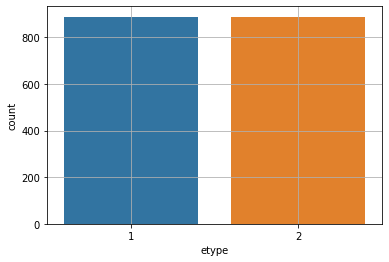

In [35]:
sns.countplot(df.etype)
plt.grid()
plt.show()

**Question 7: Drop the dependent variable from the Data Set and store it seperately. Then split your data into train and test data sets. The test data size should be 30% of the total data. Use random_state=7.**

In [36]:
X = df.drop('etype',axis=1)
Y = df.etype
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

**Question 8: Formulate a logistic regression model on the train data.**

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

**Question 9: Get the Model Score.**

In [38]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.5797373358348968


**Question 10: Generate the Confusion Matrix and Classification Report. What are your observations and recommendations?**

In [39]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[141 117]
 [107 168]] 

Classification Report 
               precision    recall  f1-score   support

           1       0.57      0.55      0.56       258
           2       0.59      0.61      0.60       275

    accuracy                           0.58       533
   macro avg       0.58      0.58      0.58       533
weighted avg       0.58      0.58      0.58       533

